In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer, sent_tokenize


### Word tokenization in different ways

In [11]:
'''if we try to use text.split() to tokenize a text there happens to be many problems
such as:
We love Pakistan, because it's beautiful! becomes
['We', 'love', 'Pakistan,', 'because', "it's", 'beautiful!']
, Pakistan, becomes a token
It's not handles
'''

# NOTE: solution NLTK handles these issues with good tokenizers
'''
word_tokenize()
-Removes punctuation from words

-Handles contractions

-Handles sentences cleanly

-Follows Penn Treebank rules

RegexpTokenizer()
-Custom regex tokenization

TweetTokenizer()

TreebankWordTokenizer()
'''

# Problem code 
text = "We love Pakistan, because it's beautiful!    \nAnd we really love it"
print("split based tokens")
whitespace_tokens = text.split()
print(whitespace_tokens)
# ['We', 'love', 'Pakistan,', 'because', "it's", 'beautiful!', 'And', 'we', 'really', 'love', 'it']

'''
Why can’t word_tokenize work without punkt?

Because word_tokenize is a wrapper around:

PunktSentenceTokenizer (needs punkt)

TreebankWordTokenizer (no download required)
'''
nltk.download('punkt') #tokenizer models

print('nltk word tokenizer')
nltk_tokens = word_tokenize(text)
print(nltk_tokens)
# ['We', 'love', 'Pakistan', ',', 'because', 'it', "'s", 'beautiful', '!', 'And', 'we', 'really', 'love', 'it']

print('TreebankTokenizer')
tbt = TreebankWordTokenizer()
treebank_tokens = tbt.tokenize(text)
print(treebank_tokens)
# ['We', 'love', 'Pakistan', ',', 'because', 'it', "'s", 'beautiful', '!', 'And', 'we', 'really', 'love', 'it']

split based tokens
['We', 'love', 'Pakistan,', 'because', "it's", 'beautiful!', 'And', 'we', 'really', 'love', 'it']
nltk word tokenizer
['We', 'love', 'Pakistan', ',', 'because', 'it', "'s", 'beautiful', '!', 'And', 'we', 'really', 'love', 'it']
TreebankTokenizer
['We', 'love', 'Pakistan', ',', 'because', 'it', "'s", 'beautiful', '!', 'And', 'we', 'really', 'love', 'it']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hafeez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Finding BoW using nltk

In [ ]:
# bag of words with split() text function
count_vect = CountVectorizer()
bag_of_words = count_vect.fit_transform(text.splitlines())
pd.DataFrame(bag_of_words.toarray(), columns=count_vect.get_feature_names_out())

,and,beautiful,because,it,love,pakistan,really,we
0,0,1,1,1,1,1,0,1
1,1,0,0,1,1,0,1,1


In [12]:
# bag of words with word_tokenizer
# since CountVectorizer expects raw text , you clean the text with tokenization and then join back for vectorization 
# i want sentence based documents 
sentences = sent_tokenize(text)
cleaned_sentences = []
for sent in sentences:
    tokens = word_tokenize(sent)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    cleaned_sentences.append(' '.join(tokens))

count_vect = CountVectorizer()
bag_of_words = count_vect.fit_transform(cleaned_sentences)
pd.DataFrame(bag_of_words.toarray(), columns=count_vect.get_feature_names_out())

,and,beautiful,because,it,love,pakistan,really,we
0,0,1,1,1,1,1,0,1
1,1,0,0,1,1,0,1,1


In [13]:
#tf-idf code

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cleaned_sentences)
pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

,and,beautiful,because,it,love,pakistan,really,we
0,0.000000,0.470426,0.470426,0.334712,0.334712,0.470426,0.000000,0.334712
1,0.533098,0.000000,0.000000,0.379303,0.379303,0.000000,0.533098,0.379303


### Count the frequency of each word in data and plot

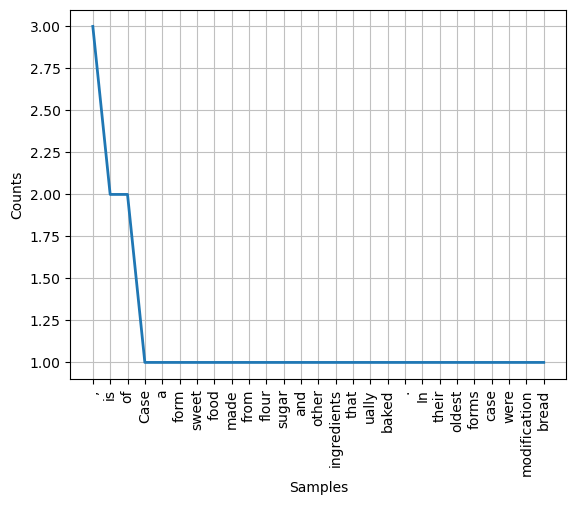

In [5]:
import nltk
import matplotlib.pyplot as plt 
content = '''Case is a form of sweet food made from flour, sugar and other ingredients, that is ually baked.
In their oldest forms, case were modification of bread'''
words = nltk.tokenize.word_tokenize(content)
fd = nltk.FreqDist(words)
fd.plot()
plt.show()

### Remove Punctuation using re

In [10]:
import re
import string 
sentence = '@TheLeagueSF Not Fun &amp; Furious? The new mantra for the bay 2 Breakers? It was getting 2 rambunctious; the city'
sentence = re.sub(r'@[A-Za-z0-9._-]+','',sentence)
sentence = re.sub(r'[{}]'.format(re.escape(string.punctuation)),'',sentence)

print(sentence)

 Not Fun amp Furious The new mantra for the bay 2 Breakers It was getting 2 rambunctious the city


In [9]:
import re
print(re.escape('[][][{}{}()]'))

\[\]\[\]\[\{\}\{\}\(\)\]


### remove URL

In [11]:
sent = '@switchfoot http://twitpic.com/2yIzl - Awww, thats bummer. You shoulda got David Carr for Third Day to dotit. ;D'
sent = re.sub('https?://[A-Za-z0-9./]+','',sent)
print(sent)

@switchfoot  - Awww, thats bummer. You shoulda got David Carr for Third Day to dotit. ;D


### remove single and double quotes

In [12]:
sent = "@machineplay I'm so sorry you're having to go through this. Again. #therapyfail"
sent = re.sub('[^a-zA-Z]',' ', sent)
print(sent)

 machineplay I m so sorry you re having to go through this  Again   therapyfail


### combine all regular expression pattersn

In [17]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join([pat1, pat2])

def text_cleaner(text):
    stripped = re.sub(combined_pat,'',text)
    print(stripped)

sent = '@switchfoot http://twitpic.com/2yIzl - Awww, thats bummer. You shoulda got David Carr for Third Day to dotit. ;D'

text_cleaner(sent)

  - Awww, thats bummer. You shoulda got David Carr for Third Day to dotit. ;D


# Collocations

In [18]:
import nltk
text = 'Piford Technologies will provide you a new kind of learning experience.'
tokens = nltk.word_tokenize(text)
output = tuple(nltk.bigrams(tokens))
print(output)

(('Piford', 'Technologies'), ('Technologies', 'will'), ('will', 'provide'), ('provide', 'you'), ('you', 'a'), ('a', 'new'), ('new', 'kind'), ('kind', 'of'), ('of', 'learning'), ('learning', 'experience'), ('experience', '.'))


In [19]:
text = 'Piford Technologies will provide you a new kind of learning experience.'
tokens = nltk.word_tokenize(text)
output = tuple(nltk.trigrams(tokens))
print(output)

(('Piford', 'Technologies', 'will'), ('Technologies', 'will', 'provide'), ('will', 'provide', 'you'), ('provide', 'you', 'a'), ('you', 'a', 'new'), ('a', 'new', 'kind'), ('new', 'kind', 'of'), ('kind', 'of', 'learning'), ('of', 'learning', 'experience'), ('learning', 'experience', '.'))


### Calculating frequency of uni-gram

In [26]:
wordsstring = 'Piford Tecchnologies will prive you a new kind of learning experience. Learning AI in Piford Tecchnologies make you job ready'
wordlist = wordsstring.split()
# print(wordlist)

wordfreq = []
for w in wordlist:
    #how many times each word appear in the list
    wordfreq.append(wordlist.count(w))
# print(wordfreq)
# lets make clear 
print("Pairs:"+str(tuple(zip(wordlist,wordfreq))))

Pairs:(('Piford', 2), ('Tecchnologies', 2), ('will', 1), ('prive', 1), ('you', 2), ('a', 1), ('new', 1), ('kind', 1), ('of', 1), ('learning', 1), ('experience.', 1), ('Learning', 1), ('AI', 1), ('in', 1), ('Piford', 2), ('Tecchnologies', 2), ('make', 1), ('you', 2), ('job', 1), ('ready', 1))


## Bigram frequency count

In [29]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

wordsstring = '''Piford Technologies will provide you a new kind of learning experience.
Learning AI in Piford Technologies make you job ready'''
wordslist = wordsstring.split()
# print(wordlist)
bigram_fd = nltk.FreqDist(nltk.bigrams(wordlist))
# return most common elements with their count 
# print(bigram_fd.most_common())
# give one bigram having more frequency, that would be collocation 
print(bigram_fd.most_common(1))


[(('Piford', 'Tecchnologies'), 2)]
